In [2]:
import pandas 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
%matplotlib inline

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

False

In [5]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 134s 1us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [11]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

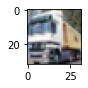

In [17]:
plot_sample(1)

In [22]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [27]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'
)

In [28]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 138s 88ms/step - loss: 1.8592 - accuracy: 0.3341
Epoch 2/50
1563/1563 [==============================] - 126s 81ms/step - loss: 1.6599 - accuracy: 0.4128
Epoch 3/50
1563/1563 [==============================] - 118s 75ms/step - loss: 1.5695 - accuracy: 0.4466
Epoch 4/50
1563/1563 [==============================] - 116s 74ms/step - loss: 1.5105 - accuracy: 0.4658
Epoch 5/50
1563/1563 [==============================] - 117s 75ms/step - loss: 1.4588 - accuracy: 0.4841
Epoch 6/50
1563/1563 [==============================] - 121s 78ms/step - loss: 1.4143 - accuracy: 0.4992
Epoch 7/50
1563/1563 [==============================] - 116s 74ms/step - loss: 1.3738 - accuracy: 0.5170
Epoch 8/50
1563/1563 [==============================] - 117s 75ms/step - loss: 1.3391 - accuracy: 0.5292
Epoch 9/50
1563/1563 [==============================] - 116s 74ms/step - loss: 1.3082 - accuracy: 0.5408
Epoch 10/50
1563/1563 [==============================] 

In [35]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [37]:
classes[np.argmax(model.predict(x_test_scaled)[1])]

'ship'

In [41]:
classes[y_test[1][0]]

'ship'

In [42]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 11s 36ms/step - loss: 1.6763 - accuracy: 0.5383


[1.6763346195220947, 0.5382999777793884]

In [47]:
def get_model():
    model=keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(1000,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])
    model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
    return model

In [49]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 115s 73ms/step - loss: 1.8581 - accuracy: 0.3384
2min 15s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
